In [1]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.layers import Flatten, Dense
from keras.models import Model, load_model
import keras
from tabnanny import verbose
import warnings
warnings.filterwarnings('ignore')


In [2]:
def preprocessinImage(path):
    image_data = ImageDataGenerator(
        zoom_range=0.2, shear_range=0.2, preprocessing_function=preprocess_input, horizontal_flip=True)
    image = image_data.flow_from_directory(directory=path, target_size=(
        224, 224), batch_size=32, class_mode='binary')
    return image


path = "G:/re/finalData/train"
train_data = preprocessinImage(path)


def preprocessinImage2(path):
    image_data = ImageDataGenerator(
        preprocessing_function=preprocess_input)
    image = image_data.flow_from_directory(directory=path, target_size=(
        224, 224), batch_size=32, class_mode='binary')
    return image


path = "G:/re/finalData/test"
test_data = preprocessinImage2(path)

path = "G:/re/finalData/val"
val_data = preprocessinImage2(path)


Found 699 images belonging to 2 classes.
Found 202 images belonging to 2 classes.
Found 99 images belonging to 2 classes.


In [3]:
base_model= MobileNet(input_shape=(224,224,3), include_top= False)

In [4]:
for layer in base_model.layers:
    layer.trainable = False

X = Flatten()(base_model.output)
X = Dense(units=1, activation='sigmoid')(X)

model = Model(base_model.input, X)

model.summary()

model.compile(optimizer='rmsprop',
              loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [5]:
#early stopping
es = EarlyStopping(monitor="val_accuracy", min_delta=0.01,
                   patience=3, verbose=1, mode='auto')
#model check point
mc = ModelCheckpoint(monitor="val_accuracy", filepath="./bestmodel2.h5",
                     verbose=1, save_best_only=True, mode='auto')
cd = [es, mc]

hs = model.fit_generator(generator=train_data, steps_per_epoch=8, epochs=36,
                         verbose=1, validation_data=val_data, validation_steps=16, callbacks=cd)

h = hs.history
h.keys()


Epoch 1/36
8/8 [==============================] - ETA: 0s - loss: 4.0954 - accuracy: 0.7930WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 16 batches). You may need to use the repeat() function when building your dataset.

Epoch 1: val_accuracy improved from -inf to 0.95960, saving model to .\bestmodel2.h5
8/8 [==============================] - 10s 1s/step - loss: 4.0954 - accuracy: 0.7930 - val_loss: 0.3084 - val_accuracy: 0.9596
Epoch 2/36
8/8 [==============================] - 5s 597ms/step - loss: 0.4964 - accuracy: 0.9102
Epoch 3/36
8/8 [==============================] - 5s 656ms/step - loss: 0.9858 - accuracy: 0.8984
Epoch 4/36
8/8 [==============================] - 5s 595ms/step - loss: 0.2228 - accuracy: 0.9844
Epoch 5/36
8/8 [==============================] - 5s 582ms/step - loss: 0.5235 - accuracy: 0.9570
Epoch 6/36
8/8 [======================

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [11]:
model = load_model('G:/re/finalData/bestmodel2.h5')

acc = model.evaluate_generator(test_data)[1]

print(f"Accuracy of the model is {acc*100} %")


Accuracy of the model is 94.05940771102905 %


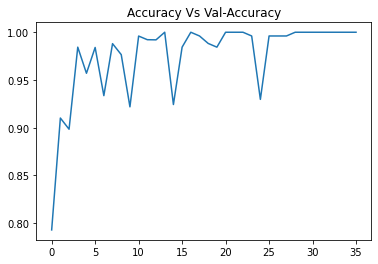

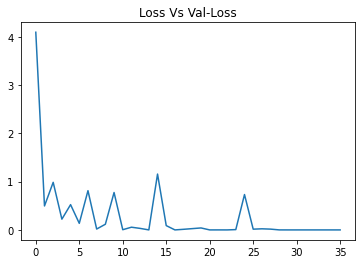

In [12]:
plt. plot(h['accuracy'])
plt.plot(h['val_accuracy'], c='red')
plt.title("Accuracy Vs Val-Accuracy")
plt.show()

plt. plot(h['loss'])
plt.plot(h['val_loss'], c='red')
plt.title("Loss Vs Val-Loss")
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 224, 224, 3)
0
cancer


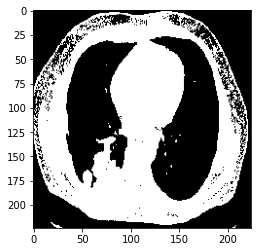

In [14]:
from keras.preprocessing.image import load_img, img_to_array
path = 'G:/re/finalData/test/cancerous/adenocarcinoma74.png'
img = load_img(path, target_size=(224, 224))
i = img_to_array(img)
input_arr = np.array([i])
print(input_arr.shape)


pred = np.argmax(model.predict(input_arr))
print(pred)

if pred == 0:
    print("cancer")
else:
    print("non_cancer")

plt.imshow(input_arr[0])
plt.show()


In [15]:
train_data.class_indices


{'cancerous': 0, 'non-cancerous': 1}